In [13]:
import os
import numpy as np 
import json
from torchvision.io import read_image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt 
import sys
sys.path.append('..')
print("Done.")
import os 
print(os.getcwd())

Done.
/home/sangbeom/resnet


In [14]:
class DepthDatasetLoader(Dataset):
    def __init__(self, root_path="/home/sangbeom/resnet/data/depth1014/", 
                       json_name="depth1014.json",
                       transform=None):
        self.root_path = root_path 
        self.json_name = json_name 
        self.json_content=[]
        for line in open(self.json_name,'r'):
            self.json_content.append(json.loads(line))
        self.image_lst = self.json_content
        self.transform = transform 

    def __len__(self):
        return len( self.image_lst)
        
    def __getitem__(self, idx):
        image_path = self.image_lst[idx]
        dir = self.root_path+image_path["file_path"]
        #image = read_image(dir)
        image = np.load(dir)
        if self.transform: 
            image = self.transform(image)
        return image
   

In [15]:
root_path = "/home/sangbeom/resnet/data/depth1014/"
depth_dataset = DepthDatasetLoader(root_path=root_path)

In [16]:
loader = DataLoader(depth_dataset, batch_size=4, shuffle=True)


In [17]:
data = next(iter(loader))
print("Image batch shape", data.shape)

Image batch shape torch.Size([4, 96, 192])


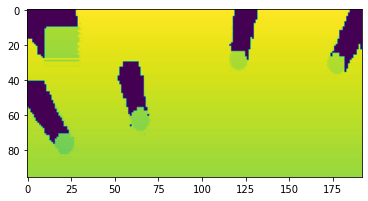

In [21]:
plt.imshow(data[3])